Phân Tích Thuật Toán
- Họ và Tên: Bùi Thị Thanh Phương
- MSSV:20110280

Bài 1

1. Viết chương trình để biểu diễn một số thập phân N sang dạng biểu diễn nhị phân có độ phức tạp thuật toán là O(log2 N).
- Input: Số thập phân N.
- Output: Dạng biểu diễn nhị phân của N.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def decimalToBinary(N):
    s = str(N%2)
    if N > 1:
        return decimalToBinary(N//2) + s 
    return s


In [16]:
bin = decimalToBinary(100)
print("decimal {} to binary number is {}".format(100, bin))

decimal 100 to binary number is 1100100


2. Giả sử các em đã xây dựng thuật toán trên. Hãy viết một chương trình
để đếm số phép gán và số phép so sánh mà chương trình trên đã dùng
để biểu diễn một số thập phân N.
- Input: binary(N), N = 100, 200, 300, 400, . . . , 1000.
- Output: Gan(N), Sosanh(N). Vẽ log2 N, Gan(N), và Sosanh(N) trên
cùng một đồ thị để so sánh.

In [4]:
def toBinary(N):
    assign = compare = 0
    
    compare += 1
    if N <= 1:
        return assign, compare
    
    s = str(N%2)
    assign += 1
    while (N != 0):
        compare += 1
        N = N//2
        s = str(N%2) + s
        assign += 2
    compare += 1
    return [assign, compare]

In [5]:
X = np.arange(1,1000+1,1)
temp = np.array([toBinary(x) for x in X])
output = pd.DataFrame(data={"N": X, "Assign": temp[:,0], "Compare": temp[:,1]}).set_index("N")
output

,Assign,Compare
N,,
1,0,1
2,5,4
3,5,4
4,7,5
5,7,5
...,...,...
996,21,12
997,21,12
998,21,12


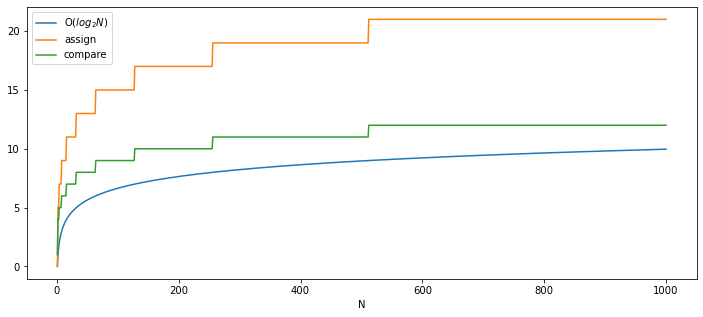

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(X, np.log2(X))
ax.plot(X, temp[:,0])
ax.plot(X, temp[:,1])
ax.set(xlabel="N")
ax.legend(["O($log_2N$)", "assign", "compare"])
plt.savefig("ex1.jpg")
plt.show()

Bài 2 (Bonus): Cho một mảng A gồm n số tự nhiên nằm [1 . . . k]. Hãy thiết
kế thuật toán để kiểm tra xem có bao nhiêu phần tử của A nằm trong [a, b]
có độ phức tạp là O(N + k) và chứng minh thuật toán của các em đưa ra
có độ phức tạp như trên.
- Input: Xét hai trường hợp
  - N = 10, 20, 30, . . . , 10000 (k cố định, k = 100).
  -  k = 10, 20, 30, . . . (N cố định, N = 20000).
Tạo ngẫu nhiên mảng A với [a, b] tương ứng.
- Output: Đếm số phép gán, số phép so sánh và so sánh với O(N + k).


In [7]:
def checkArray(A, N, k, a, b):
    assign = compare = 0
    
    count_eles_in_A = np.zeros(k+1)
    count = 0
    assign += 2
    
    for i in range(N):
        compare += 1
        count_eles_in_A[A[i]] += 1
        assign += 1
    compare += 1
    
    for i in range(1,k+1):
        compare += 1
        if i >= a:
            compare += 1
            if i <= b:
                compare += 1
                count += count_eles_in_A[i]
                assign += 1
    compare += 1
    return count, assign, compare

In [ ]:
 def check_Array(A, N, k, a, b):
        count_elements_in_A = np.zeros(k+1)
        count = 0
        
        for i in range (0, k-1):
            count_elements_in_A[A[i]] +=1
        for i in range(k):
            
            if i >=a:
                if i <=b:
                    count += count_elements_in_A[i]
    return count
                    
                    
                    
                    
        
                    
            
        
    
        

In [8]:
N = 10
k = 15
a = 3
b = 7
np.random.seed(0)
A = np.random.randint(1,k+1, size=N)
print(A)

[13  6  1  4 12  4  8 10  4  6]


In [9]:
count, assign, compare = checkArray(A,N,k,a,b)
print("Number of values in A in [{}, {}]: {}".format(a, b, count))
print(assign, compare)

Number of values in A in [3, 7]: 5.0
17 45


In [10]:
a = 10
b = 90

C:\Users\DELL\AppData\Local\Temp\ipykernel_7296\228457720.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  AA = np.array([np.random.randint(1, k+1, size = n) for n in N])


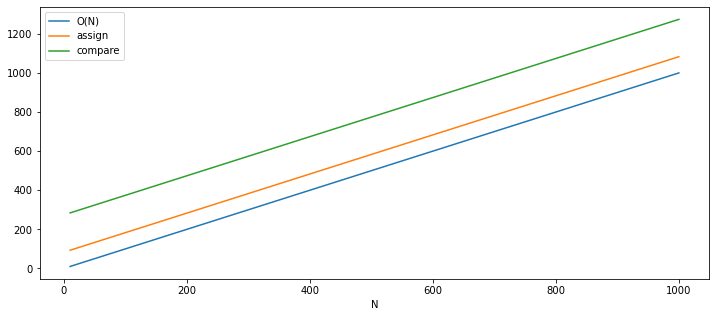

In [11]:
k = 100
N = np.arange(10,1000+1,10)
np.random.seed(0)
AA = np.array([np.random.randint(1, k+1, size = n) for n in N])
temp = np.array([checkArray(A, n, k, a, b) for (A, n) in zip(AA, N)])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(N, N)
ax.plot(N, temp[:,1])
ax.plot(N, temp[:,2])
ax.set(xlabel="N")
ax.legend(["O(N)", "assign", "compare"])
plt.savefig("ex2_Fitk.jpg")
plt.show()

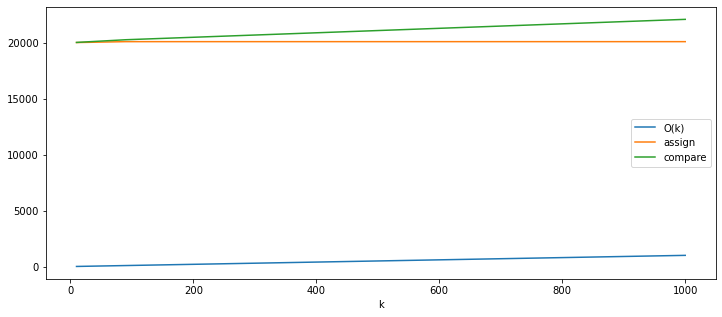

In [12]:
N = 20000
K = np.arange(10,1000+1,10)
np.random.seed(0)
AA = np.array([np.random.randint(1, k+1, size = N) for k in K])
temp = np.array([checkArray(A, N, k, a, b) for (A, k) in zip(AA, K)])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(K, K)
ax.plot(K, temp[:,1])
ax.plot(K, temp[:,2])
ax.set(xlabel="k")
ax.legend(["O(k)", "assign", "compare"])
plt.savefig("ex2_FitN.jpg")
plt.show()